In [75]:
import pandas as pd
import os

#### Task 1 : Merge 12 months of sales data into a single CSV file

In [76]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")] 

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [79]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Clean Up The Data

#### Drop rows of NaN

In [80]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Find "Or" and Delete it

In [83]:
# temp_df = all_data[all_data["Order Date"].str[0:2] != "Or"]
# temp_df.head()

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]


##### Convert Columns to the correct type

In [88]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # Make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) # Make float


### Augment Data with additional columns

#### Task 2: Add Month Column

In [84]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Task 3: Add a Sales Column

In [89]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Question 1: hat was the best month for sales? How much was earned that month

In [110]:
results = all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


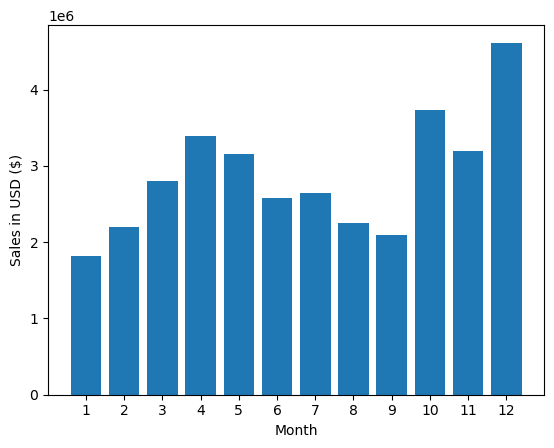

In [106]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")
plt.show()

### So the best month for sales is December and was earned around 4613443

-----

## Question 2: What city had the highest number of sales?

##### Task 4: Add a city column

In [111]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [140]:
# Let's use .apply()

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

# all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1])


# all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")




all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [142]:
results = all_data.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


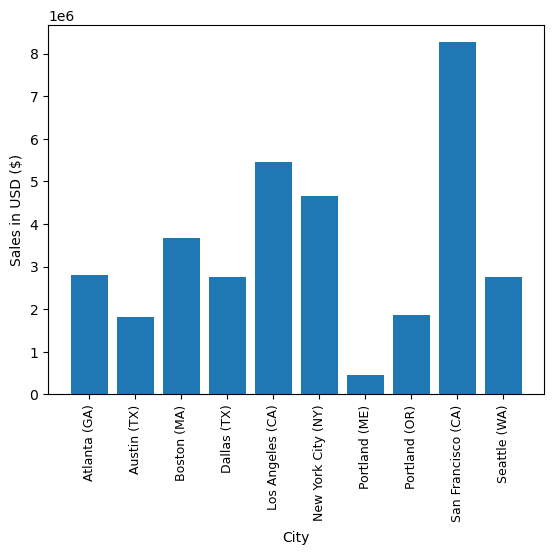

In [199]:
# cities = all_data["City"].unique()
cities = [city for city, df in all_data.groupby("City")]

plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation="vertical", size=9)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.show()

### Answer: Fransisco is the highest number of sales

----


## Question 3: What time we display advertisements to maximize likelihood of customer's buying product?

##### Convert column Order Date to Date Time

In [154]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

##### Pick hour and minute from Order Date

In [157]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


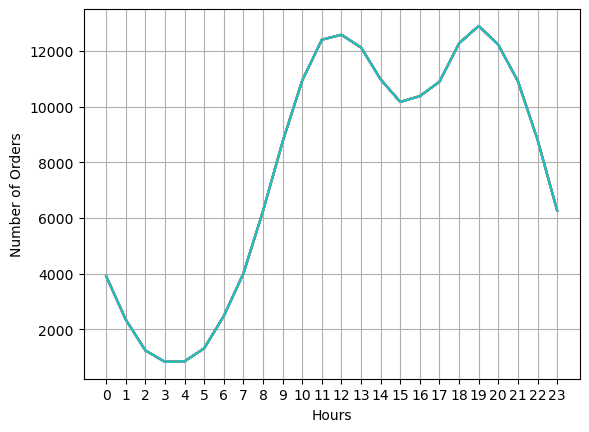

In [168]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())

# all_data.groupby(["Hour"]).count()

plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

### Answer: My recommendation to do advertisiments is around 11am (11.00) or 7pm (19.00)

---

## Question 4: What products are most often sold together?

In [172]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


/var/folders/hj/d41qj_ms4_g6d6sjz3zmf1ym0000gn/T/ipykernel_41444/3935588620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


##### Drop Duplicates

In [171]:
df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [179]:
from itertools import combinations 
from collections import Counter

count = Counter()

for row in df ["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


### Answer: The products are often most sold together are iPhone, Lightning Charging Cable

---

## Question 5: What product sold the most? Why do you think it sold the most?

In [180]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [187]:
product_group = all_data.groupby("Product")

quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

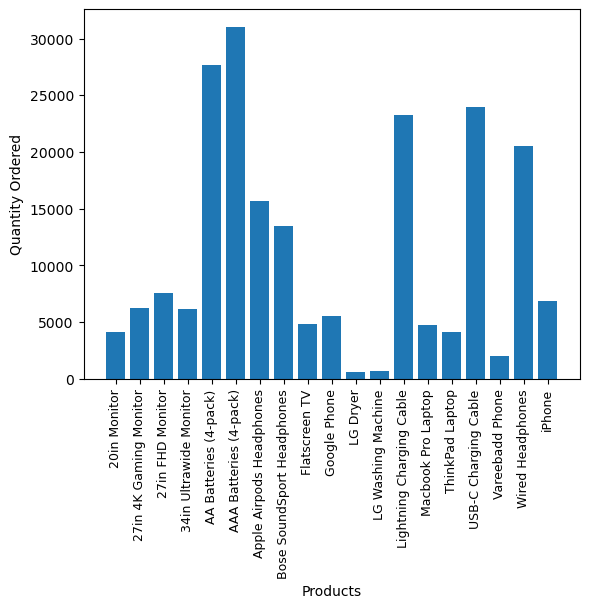

In [201]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical", size=9)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")

plt.show()

/var/folders/hj/d41qj_ms4_g6d6sjz3zmf1ym0000gn/T/ipykernel_41444/226582096.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=9)


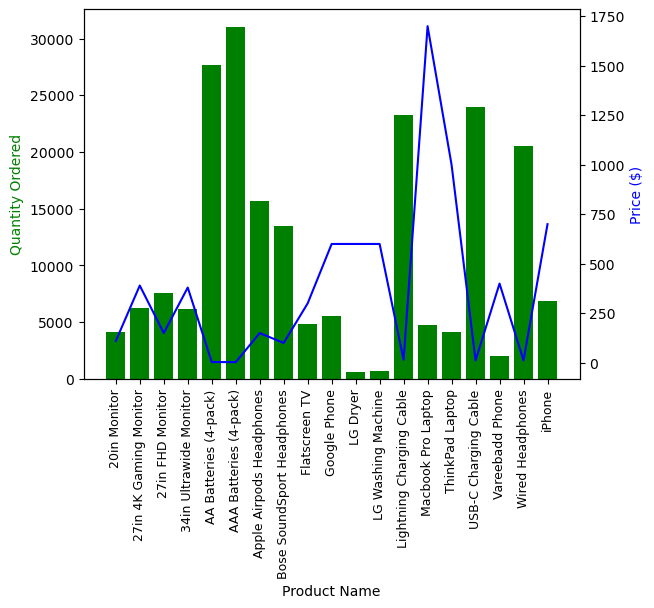

In [206]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, "-b")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price ($)", color="b")
ax1.set_xticklabels(products, rotation="vertical", size=9)

plt.show()